## **Project Name** - Sales Prediction Using Python

#### Project Type - Prediction
#### Name - Aryan Patel
#### Task - 3
#### Github Respo - https://github.com/aryanap11/OIBSIP
#### **Project Description -**

* The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [625]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##  ***1) READ DATASET*** 

In [626]:
import pandas as pd
import numpy as np

In [627]:
df= pd.read_csv("car data.csv")

In [628]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [629]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


## ***2) DATASET ANALYSIS***

In [630]:
# rows/columns of dataset
df.shape

(301, 9)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [632]:
#Get number of duplicate rows
df.duplicated().sum()

2

In [633]:
# Get number of null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [634]:
#Get statistical summary of dataset(numeric values)
df.describe().round(3)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.643,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [635]:
print("Fuel_Type ",df.Fuel_Type.unique())
print("Selling_type ",df.Selling_type.unique())
print("Transmission ",df.Transmission.unique())
print("Owner ",df.Owner.unique())


Fuel_Type  ['Petrol' 'Diesel' 'CNG']
Selling_type  ['Dealer' 'Individual']
Transmission  ['Manual' 'Automatic']
Owner  [0 1 3]


### Conclusion about the dataset:


- The dataset contains data about Car_Name	Year,	Selling_Price,	Present_Price,	Driven_kms,	Fuel_Type,	Selling_type,	Transmission,	Owner.
- There are 301 rows and 9 columns in the data.
- 2 duplicate rows present in dataset.
- No Null values present in dataset.

## ***3) DATA TRANSFORMATION***

In [636]:
# adding a column of current year as 2024
df['Current_year']=2024

#  Calculating age of the vehicles by subtracting the 'Year' from the 'Current Year'
df['age']=df['Current_year']-df['Year']


In [637]:
df.drop(['Current_year'],axis=1,inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


## ***4) DATA VISUALIZATION***

In [638]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 4.1) Countplot visualisation for categorical variables

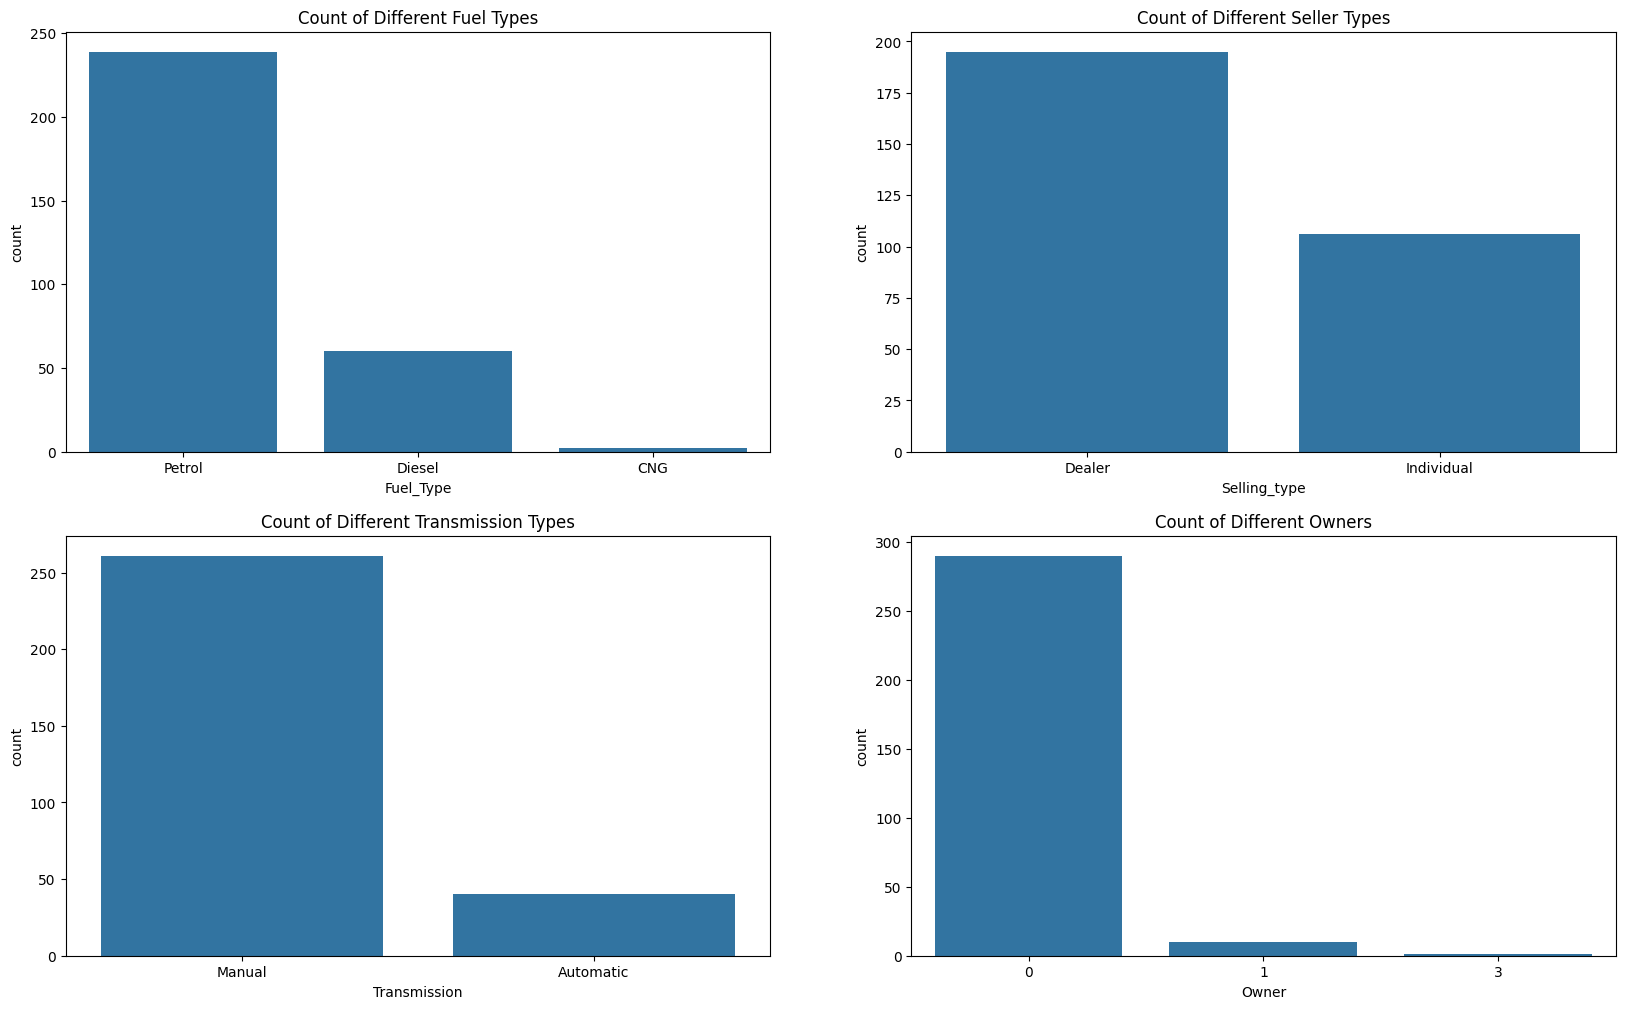

In [639]:

plt.figure(figsize=(20,12))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

##### Insights from the chart:

* No. of cars with fuel type Petrol are much higher than Diseal and CNG.

* We can observe that cars sold through Dealers are more than that through Individual sellers.
* Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners.

#### 4.2) Visualization of Categorical variable vs Target variable

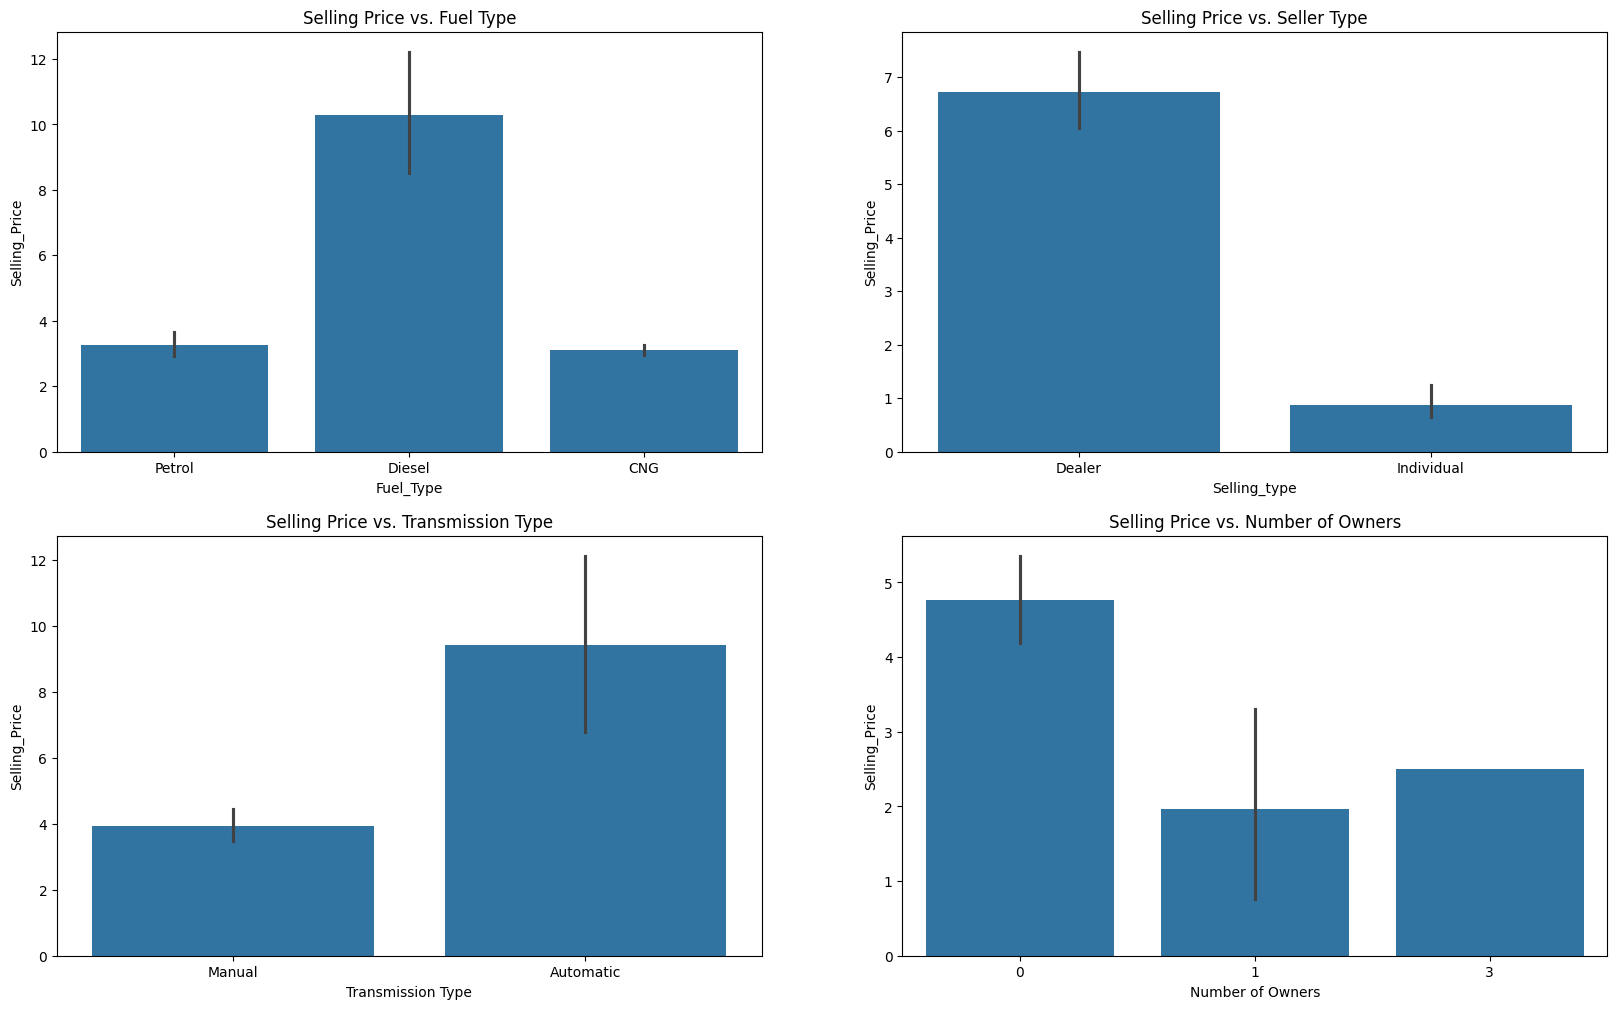

In [640]:

plt.figure(figsize=(20,12))

# Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.title('Selling Price vs. Fuel Type')

# Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Selling_type')
plt.ylabel('Selling_Price')
plt.title('Selling Price vs. Seller Type')

# Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling_Price')
plt.title('Selling Price vs. Transmission Type')

# Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling_Price')
plt.title('Selling Price vs. Number of Owners')

plt.show()

##### Insights from the chart:

* Diseal cars have higher selling price compared to Petrol and CNG cars.

* The cars sold by Dealers have a higher price whereas Individual sellers sell at low price.
* Selling price of automatic cars are comparitively higher .
* First Owner cars hold higher selling price value.

#### 4.3) Driven_kms vs selling price

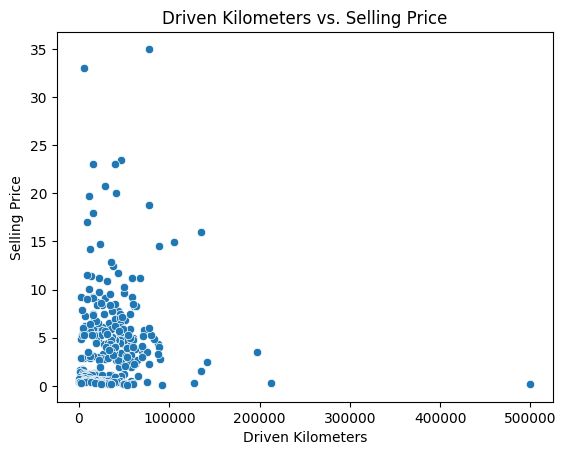

In [641]:
# Create the scatter plot
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Driven Kilometers vs. Selling Price')
plt.show()

#### 4.4) Correlation Heatmap

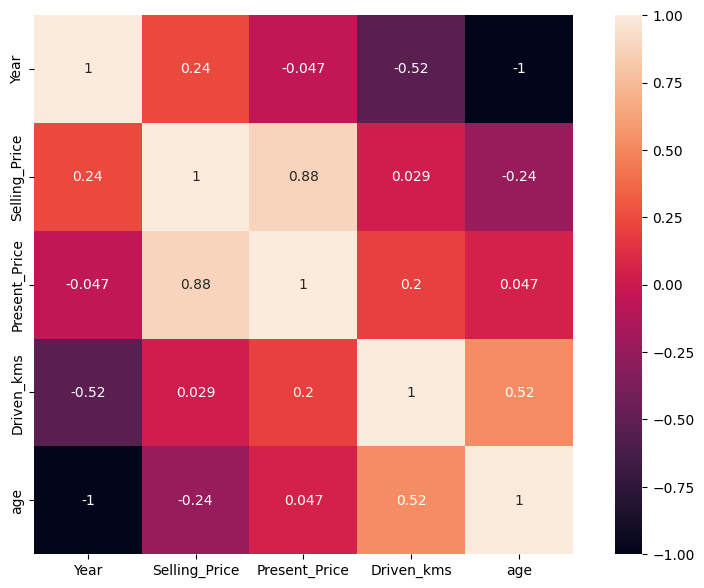

In [642]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df[['Year','Selling_Price', 'Present_Price', 'Driven_kms', 'age']].corr()
plt.figure(figsize=(11, 7))
sns.heatmap(corrmat,annot=True , square=True)
plt.show()

##### Insights from the chart:

* Present_ price and Selling price are highly positvely correlated.his suggests that cars with higher present prices tend to have higher selling prices.

* Driven_kms and Age have moderate positive correlaion and thats obvious because as car get older it get more used.

* Selling price and Age are negatively correlated suggesting more the car is used selling value decreases.


In [643]:
corrmat

,Year,Selling_Price,Present_Price,Driven_kms,age
Year,1.000000,0.236141,-0.047192,-0.524342,-1.000000
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.236141
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.047192
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.524342
age,-1.000000,-0.236141,0.047192,0.524342,1.000000


## ***5) Feature Engineering & Data Pre-processing***

#### 1. Droping unwanted columns

In [644]:
# Car_Name is no longer needed 
df.drop(['Car_Name'], axis=1, inplace=True)

In [645]:
# we already calculated AGE so 'Year' not needed
df.drop(['Year'], axis=1, inplace=True)

In [646]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


#### 2. Categorical Data Encoding

In [647]:
# converting categorical variables into numerical format(one-hot encoding)
df = pd.get_dummies(df)
df

,Selling_Price,Present_Price,Driven_kms,Owner,age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,False,True,False,True,False,False,True
297,4.00,5.90,60000,0,9,False,False,True,True,False,False,True
298,3.35,11.00,87934,0,15,False,False,True,True,False,False,True
299,11.50,12.50,9000,0,7,False,True,False,True,False,False,True


#### 3. Selecting Features and Target variables

In [648]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [652]:
# features
x = df [['Present_Price', 'Driven_kms', 'Owner', 'age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual']]

In [653]:
# target 
y = df[['Selling_Price']]

## ***6) ML MODEL***

In [701]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Splitting The Data Into Test And Train Data

In [734]:
X_train , X_test , y_train , y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

In [735]:
def evaluate_model(y_test, y_pred):
   
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Create a DataFrame with the results
    evaluation = [mae, mse, rmse, r2]
    return evaluation

In [736]:
score = pd.DataFrame(index = ['MAE', 'MSE', 'RMSE',  'R2'])

### Model-1 Linear Regression

In [737]:
# Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso

model = LinearRegression()
model.fit(X_train , y_train )

y_pred  = model .predict(X_test )

In [738]:
score['LR']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

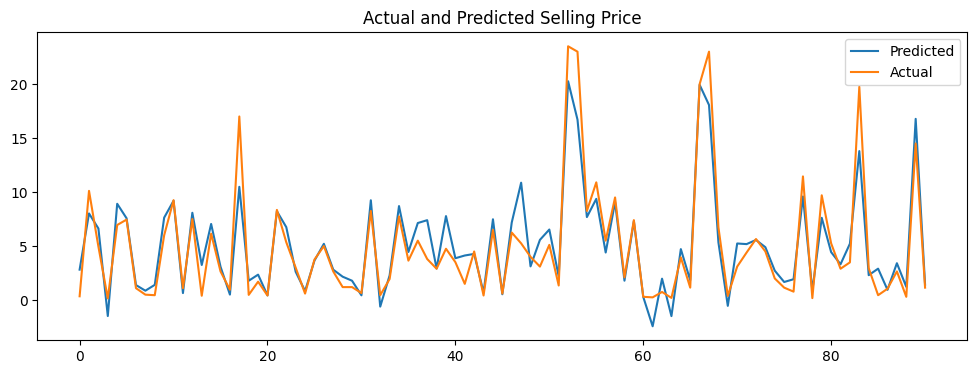

In [739]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [740]:
score

,LR
MAE,1.269970
MSE,3.544003
RMSE,1.882552
R2,0.875536


### Model-2 Lasso Regression

In [741]:
# Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [742]:
score['Lasso']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

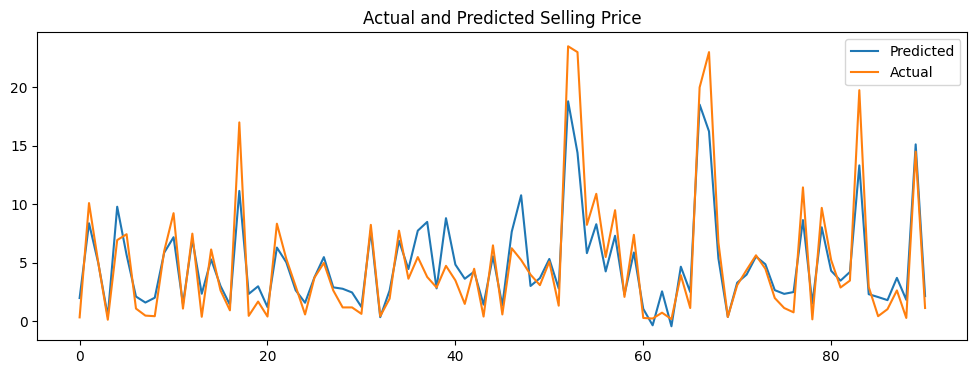

In [743]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [744]:
score

,LR,Lasso
MAE,1.269970,1.457204
MSE,3.544003,4.569927
RMSE,1.882552,2.137739
R2,0.875536,0.839506


### Model-3 Ridge Regression

In [745]:
# Ridge Regression
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [746]:
score['Ridge']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

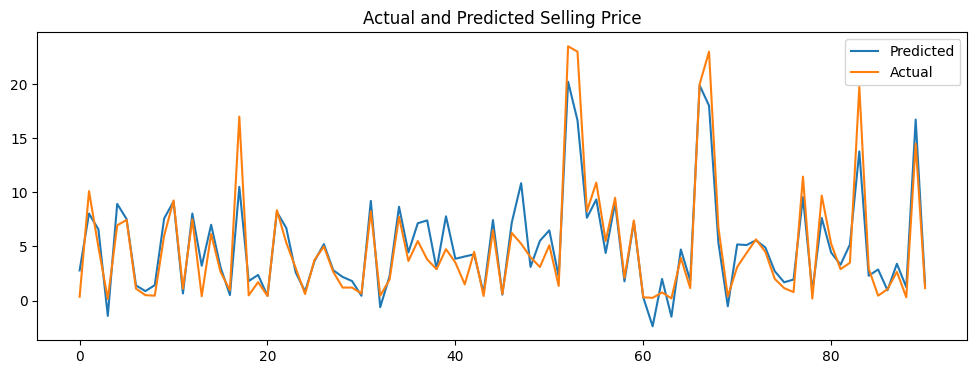

In [747]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [748]:
score

,LR,Lasso,Ridge
MAE,1.269970,1.457204,1.266417
MSE,3.544003,4.569927,3.528817
RMSE,1.882552,2.137739,1.878515
R2,0.875536,0.839506,0.876070


### Model-4 Decision Tree Regressor

In [749]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [750]:
score['DTR']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

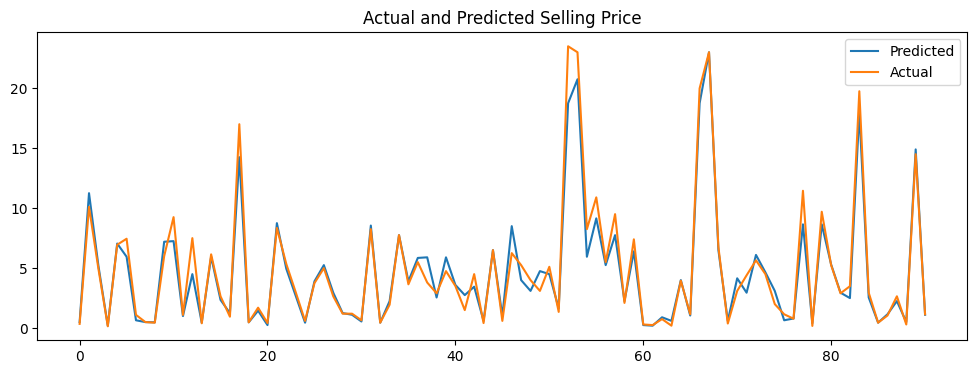

In [751]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [752]:
score

,LR,Lasso,Ridge,DTR
MAE,1.269970,1.457204,1.266417,0.668022
MSE,3.544003,4.569927,3.528817,1.175210
RMSE,1.882552,2.137739,1.878515,1.084071
R2,0.875536,0.839506,0.876070,0.958727


### Model-5 Random Forest Regressor

In [753]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [754]:
score['RFR']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

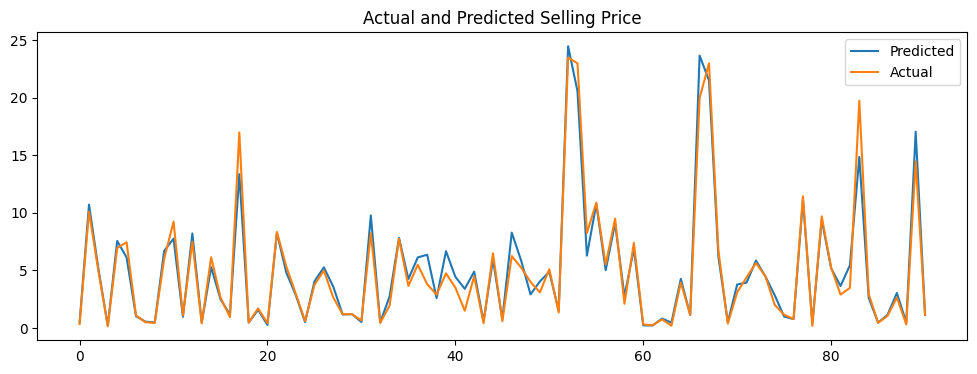

In [755]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [756]:
score

,LR,Lasso,Ridge,DTR,RFR
MAE,1.269970,1.457204,1.266417,0.668022,0.659999
MSE,3.544003,4.569927,3.528817,1.175210,1.231525
RMSE,1.882552,2.137739,1.878515,1.084071,1.109741
R2,0.875536,0.839506,0.876070,0.958727,0.956749


## Model-6 Gradient Boosting Regressor

In [761]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [762]:
score['GBR']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

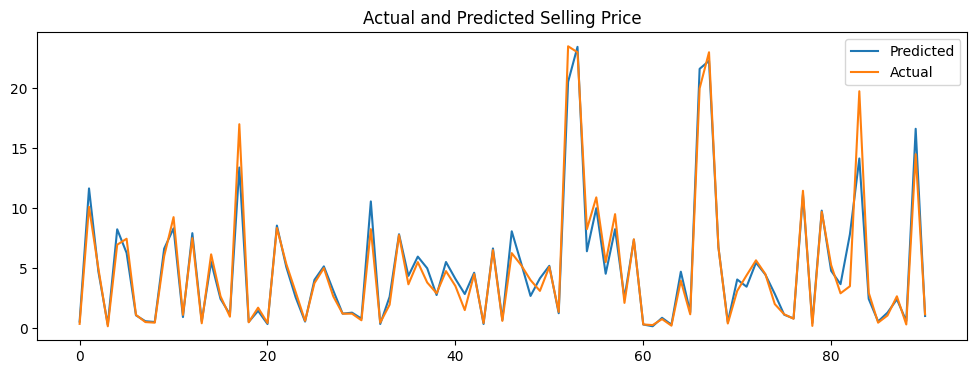

In [763]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [765]:
score

,LR,Lasso,Ridge,DTR,RFR,GBR
MAE,1.269970,1.457204,1.266417,0.668022,0.659999,0.642853
MSE,3.544003,4.569927,3.528817,1.175210,1.231525,1.281959
RMSE,1.882552,2.137739,1.878515,1.084071,1.109741,1.132236
R2,0.875536,0.839506,0.876070,0.958727,0.956749,0.954978


## Model-7 Support Vector Regressor

In [766]:
# Support Vector Regressor
from sklearn.svm import SVR

model = SVR()
model.fit(X_train , y_train )

y_pred  = model.predict(X_test )

In [767]:
score['SVR']=evaluate_model(y_test, y_pred)

Text(0.5, 1.0, 'Actual and Predicted Selling Price')

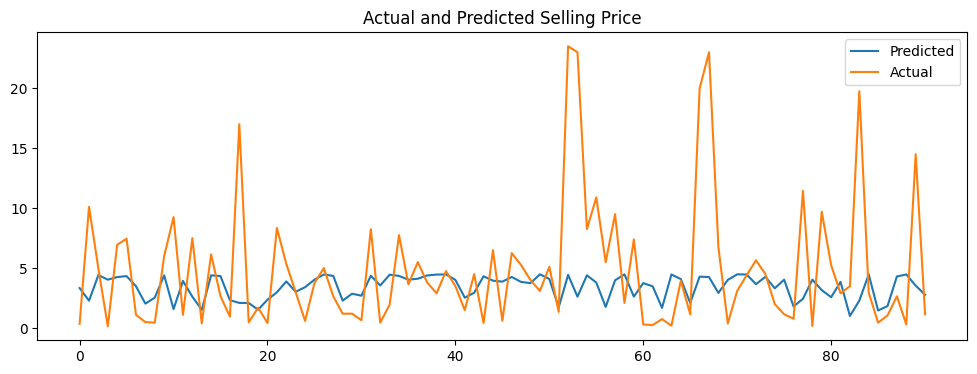

In [768]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)

In [769]:
score

,LR,Lasso,Ridge,DTR,RFR,GBR,SVR
MAE,1.269970,1.457204,1.266417,0.668022,0.659999,0.642853,3.485795
MSE,3.544003,4.569927,3.528817,1.175210,1.231525,1.281959,30.720294
RMSE,1.882552,2.137739,1.878515,1.084071,1.109741,1.132236,5.542589
R2,0.875536,0.839506,0.876070,0.958727,0.956749,0.954978,-0.078882
